# 12d - AgriPV: Designing for adecuate crop shading 

This journal supports the process of designing a solar panel configuration to appropriately represent ideal shading conditions for coffee production underneath elevated solar panels. 

The coffee trees would be under and/or in between elevated solar panels (panels would be elevated 6, 8, or 10 ft tall). The light/shade analysis helps determine appropriate panel heights and spacings t0 achieve appropriate shading.  The desired level of shading is maximum of 30% (i.e., 70% of normal, unshaded light). 

Details:
1.  The coffee plants are expected to be \~5 ft tall. (5-6 ft tall and 3 ft wide (<a href="https://realgoodcoffeeco.com/blogs/realgoodblog/how-to-grow-a-coffee-plant-at-home#:~:text=However%2C%20you%20must%20keep%20in,tall%20and%203%20feet%20wide">Reference</a>)
2.	Location: 18.202142, -66.759187; (18°12'07.7"N 66°45'33.1"W)
3.	Desired area of initial analysis: 400-600 ft2 (37-55 m2)
4.	Racking: Fixed-tilt panels
5.	Panel size: 3.3 feet x 5.4 feet                                    (1m x 1.64m)
6.	Analysis variations
<ul> <li> a.	Panel height: would like to examine heights of 6 ft, 8 ft, and 10 ft hub height. 
<li> b.	Panel spacing (N/W): would like to look at multiple distances (e.g., 2 ft, 3 ft, 4 ft) </li> 
<li> c.	Inter-Row spacing (E/W): would like to look at multiple distances (e.g., 2 ft, 3 ft, 4 ft)! </li> 


Steps on this Journal:
<ol>
    <li> <a href='#step1'> <u><b>Loop to Raytrace and sample irradiance at where Three would be located </u></b></li>
    <li> <a href='#step2'> Calculate GHI for Comparisons </li>
        <ul><li> <a href='#step2a'> Option 1: Raytrace of Empty Field  </li></ul>
        <ul><li> <a href='#step2b'> Option 2: Weather File </li></ul>
    <li> <a href='#step3'> Compile Results </li>
    <li> <a href='#step4'> Plot Results</li>
    <li> <a href='#step5'> <u><b> Raytrace with Tree Geometry <u></b></li>
        <ul><li> <a href='#step5a'>Tree Parameters</li></ul>
        <ul><li> <a href='#step5b'>Loop to Raytrace and Sample Irradiance at Each side of the Tree (N, S, E, W)</li></ul>
        <ul><li> <a href='#step5c'>Single simulation until MakeOct for Getting a PRETTY IMAGE </li></ul>
    <li> <a href='#step6'> Compile Results</li>
    <li> <a href='#step7'>  Plot </li>

</ol>
        

        
![AgriPV Coffee Trees Simulation](../images_wiki/AdvancedJournals/AgriPV_CoffeeTrees.PNG)

        

In [1]:
import bifacial_radiance
import os
from pathlib import Path
import numpy as np
import pandas as pd

In [3]:
testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' / 'AgriPVCropShading')
if not os.path.exists(testfolder):
    os.makedirs(testfolder)
print(testfolder)

resultsfolder = os.path.join(testfolder, 'results')

C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico


### General Parameters and Variables

In [2]:
lat = 18.202142
lon = -66.759187

albedo = 0.25 # Grass value from Torres Molina, "Measuring UHI in Puerto Rico" 18th LACCEI 
              # International Multi-Conference for Engineering, Education, and Technology

ft2m = 0.3048

# Loops
clearance_heights = np.array([6.0, 8.0, 10.0])* ft2m
xgaps = np.array([2, 3, 4]) * ft2m
Ds = np.array([2, 3, 4]) * ft2m    # D is a variable that represents the spacing between rows, not-considering the collector areas.
tilts = [round(lat), 10]

x = 1.64
y = 1        
azimuth = 180
nMods = 20
nRows = 7
numpanels = 1
moduletype = 'PR'
hpc = False
sim_general_name = 'Coffee'

In [4]:
if not os.path.exists(os.path.join(testfolder, 'EPWs')):
    demo = bifacial_radiance.RadianceObj('test',testfolder)  
    epwfile = demo.getEPW(lat,lon)    
else:
    epwfile = r'EPWs\PRI_Mercedita.AP.785203_TMY3.epw' 

<a id='step1'></a>

## 1. Loop to Raytrace and sample irradiance at where Three would be located

In [6]:
demo = bifacial_radiance.RadianceObj(sim_general_name,str(testfolder))  
demo.setGround(albedo)
demo.readWeatherFile(epwfile)
demo.genCumSky()

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico
Loading albedo, 1 value(s), 0.250 avg
1 nonzero albedo values.
start: 1991-01-01 01:00:00
end: 1994-12-31 23:00:00
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
message: Error!  Solar altitude is -13 < -6 degrees and Idh = 11 > 10 W/m^2 on day 52 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 16 > 10 W/m^2 on day 58 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 14 > 10 W/m^2 on day 59 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 11 > 10 W/m^2 on day 59 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 14 > 10 W/m^2 on day 61 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 16 > 10 W/

'skies\\cumulative.rad'

In [7]:
for ch in range (0, len(clearance_heights)):
    
    clearance_height = clearance_heights[ch]
    for xx in range (0, len(xgaps)):
        
        xgap = xgaps[xx]

        for tt in range (0, len(tilts)):
        
            tilt = tilts[tt]
            for dd in range (0, len(Ds)):
                pitch = y * np.cos(np.radians(tilt))+Ds[dd]

                sim_name = (sim_general_name+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1)))

                # Coffe plant location at:
                coffeeplant_x = (x+xgap)/2
                coffeeplant_y = pitch/2

                demo.makeModule(name=moduletype, x=x, y=y, xgap = xgap)
                sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 
                scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)
                octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  
                analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)

                # Modify sensor position to coffee plant location
                frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=1)
                groundscan = frontscan.copy() 
                groundscan['xstart'] = coffeeplant_x
                groundscan['ystart'] = coffeeplant_y
                groundscan['zstart'] = 0.05
                groundscan['orient'] = '0 0 -1'
                analysis.analysis(octfile, name=sim_name+'_Front&Back', frontscan=frontscan, backscan=backscan)
                analysis.analysis(octfile, name=sim_name+'_Ground&Back', frontscan=groundscan, backscan=backscan)

                


Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back.csv
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Ground&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Ground&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been

Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.6_Ground&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.6_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Front&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Front&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Front&Back.csv
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Ground&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Ground&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.9_tilt_10_pitch_1.9_Ground&Back.cs

Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_1.9_Front&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_1.9_Front&Back.csv
Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_1.9_Ground&Back_Front
Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_1.9_Ground&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_1.9_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_2.2_Front&Back_Front
Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_2.2_Front&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_2.2_Front&Back.csv


Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_2.2_Front&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_2.2_Front&Back.csv
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_2.2_Ground&Back_Front
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_2.2_Ground&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_2.2_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_2.4_xgap_1.2_tilt_18_pitch_1.6_Front&Back_Front
Linescan in process: Coffee_ch_2.4_xgap_1.2_tilt_18_pitch_1.6_Front&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_1.2_tilt_18_pitch_1.6_Front&Back.csv


Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.6_Front&Back_Back
Saved: results\irr_Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.6_Front&Back.csv
Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.6_Ground&Back_Front
Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.6_Ground&Back_Back
Saved: results\irr_Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.6_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.9_Front&Back_Front
Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.9_Front&Back_Back
Saved: results\irr_Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.9_Front&Back.csv


Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_1.9_Front&Back_Back
Saved: results\irr_Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_1.9_Front&Back.csv
Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_1.9_Ground&Back_Front
Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_1.9_Ground&Back_Back
Saved: results\irr_Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_1.9_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_2.2_Front&Back_Front
Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_2.2_Front&Back_Back
Saved: results\irr_Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_2.2_Front&Back.csv


<a id='step2'></a>

## 2. Calculate GHI for Comparisons

<a id='step2a'></a>


### Option 1: Raytrace of Empty Field

In [9]:
sim_name = 'EMPTY'
demo.makeModule(name=moduletype, x=0.001, y=0.001, xgap = 0)
sceneDict = {'tilt':0,'pitch':2,'clearance_height':0.005,'azimuth':180, 'nMods': 1, 'nRows': 1} 
scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)
octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  
analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)
frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=1)
emptyscan = frontscan.copy() 
emptyscan['xstart'] = 3
emptyscan['ystart'] = 3
emptyscan['zstart'] = 0.05
emptyscan['orient'] = '0 0 -1'
emptybackscan = emptyscan.copy()
emptybackscan['orient'] = '0 0 1'
analysis.analysis(octfile, name='_EMPTYSCAN', frontscan=emptyscan, backscan=emptybackscan)

resname = os.path.join(resultsfolder, 'irr__EMPTYSCAN.csv')
data = pd.read_csv(resname)
puerto_rico_Year = data['Wm2Front'][0]
print("YEARLY TOTAL Wh/m2:", puerto_rico_Year)




Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: _EMPTYSCAN_Front
Linescan in process: _EMPTYSCAN_Back
Saved: results\irr__EMPTYSCAN.csv


({'Wm2': [1940242.0],
  'x': [3.0],
  'y': [3.0],
  'z': [0.05],
  'r': [1940242.0],
  'g': [1940242.0],
  'b': [1940242.0],
  'mattype': ['groundplane'],
  'title': '_EMPTYSCAN_Front'},
 {'Wm2': [2197002.0],
  'x': [3.0],
  'y': [3.0],
  'z': [0.05],
  'r': [2197002.0],
  'g': [2197002.0],
  'b': [2197002.0],
  'mattype': ['sky'],
  'title': '_EMPTYSCAN_Back'})

<a id='step2b'></a>

### Option 2: Weather File

In [14]:
# Reference GHI
epwfile2 = r'C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico\EPWs\PRI_Mercedita.AP.785203_TMY3.epw'
rad_obj = bifacial_radiance.RadianceObj()
metdata = rad_obj.readWeatherFile(epwfile2)

starts = [2881, 3626, 4346, 5090, 5835]
ends = [3621, 4341, 5085, 5829, 6550]

ghi_PR=[]
for ii in range(0, len(starts)):
    start = starts[ii]
    end = ends[ii]
    ghi_PR.append(metdata.ghi[start:end].sum())
puerto_Rico_Monthly = ghi_PR     # Wh/m2
puerto_Rico_YEAR = metdata.ghi.sum()  # Wh/m2

print(puerto_Rico_Monthly)
print(puerto_Rico_YEAR)

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico
start: 1991-01-01 01:00:00
end: 1994-12-31 23:00:00
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


1974238

<a id='step3'></a>

## 3. Compile Results

In [86]:
ch_all = []
xgap_all = []
tilt_all = []
pitch_all = []
FrontIrrad = []
RearIrrad = []
GroundIrrad = []

for ch in range (0, len(clearance_heights)):
    
    clearance_height = clearance_heights[ch]
    for xx in range (0, len(xgaps)):
        
        xgap = xgaps[xx]

        for tt in range (0, len(tilts)):
        
            tilt = tilts[tt]
            for dd in range (0, len(Ds)):
                pitch = y * np.cos(np.radians(tilt))+Ds[dd]

                # irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back.csv
                sim_name = ('irr_Coffee'+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1))+'_Front&Back.csv')

                sim_name2 = ('irr_Coffee'+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1))+'_Ground&Back.csv')

                ch_all.append(clearance_height)
                xgap_all.append(xgap)
                tilt_all.append(tilt)
                pitch_all.append(pitch)
                data = pd.read_csv(os.path.join(resultsfolder, sim_name))
                FrontIrrad.append(data['Wm2Front'].item())
                RearIrrad.append(data['Wm2Back'].item())
                data = pd.read_csv(os.path.join(resultsfolder, sim_name2))
                GroundIrrad.append(data['Wm2Front'].item())

ch_all = pd.Series(ch_all, name='clearance_height')
xgap_all = pd.Series(xgap_all, name='xgap')
tilt_all = pd.Series(tilt_all, name='tilt')
pitch_all = pd.Series(pitch_all, name='pitch')
FrontIrrad = pd.Series(FrontIrrad, name='FrontIrrad')
RearIrrad = pd.Series(RearIrrad, name='RearIrrad')
GroundIrrad = pd.Series(GroundIrrad, name='GroundIrrad')

df = pd.concat([ch_all, xgap_all, tilt_all, pitch_all, FrontIrrad, RearIrrad, GroundIrrad], axis=1)
df


,clearance_height,xgap,tilt,pitch,FrontIrrad,RearIrrad,GroundIrrad
0,1.8288,0.6096,18,1.560657,2006949.0,269721.4,1107794.0
1,1.8288,0.6096,18,1.865457,2003910.0,300159.1,1285299.0
2,1.8288,0.6096,18,2.170257,2014171.0,326277.7,1401914.0
3,1.8288,0.6096,10,1.594408,1997620.0,274347.8,1126451.0
4,1.8288,0.6096,10,1.899208,2005782.0,306210.0,1309207.0
5,1.8288,0.6096,10,2.204008,2026525.0,327772.3,1383054.0
6,1.8288,0.9144,18,1.560657,2013720.0,294034.0,1260653.0
7,1.8288,0.9144,18,1.865457,2014078.0,324118.1,1380054.0
8,1.8288,0.9144,18,2.170257,2012142.0,344531.5,1460223.0
9,1.8288,0.9144,10,1.594408,2018057.0,299397.1,1290753.0


#### Let's calculate some relevant metrics for irradiance

In [87]:
df[['GroundIrrad_percent_GHI']] = df[['GroundIrrad']]*100/puerto_Rico_YEAR
df['FrontIrrad_percent_GHI'] = df['FrontIrrad']*100/puerto_Rico_YEAR
df['RearIrrad_percent_GHI'] = df['RearIrrad']*100/puerto_Rico_YEAR
df['BifacialGain'] = df['RearIrrad']*0.65*100/df['FrontIrrad']

In [88]:
print(df['GroundIrrad_percent_GHI'].min())
print(df['GroundIrrad_percent_GHI'].max())

55.712127919734094
77.72902760457453


<a id='step4'></a>

## 4. Plot results

In [89]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [90]:
tilts_l = list(df['tilt'].unique())
ch_l = list(df['clearance_height'].unique())
print(tilts_l)
print(ch_l)

[18, 10]
[1.8288000000000002, 2.4384, 3.048]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


xgap         0.6        0.9        1.2
pitch                                 
1.6    57.649230  61.657308  67.723851
1.9    64.362149  68.001933  72.281609
2.2    68.785020  72.234148  76.323625


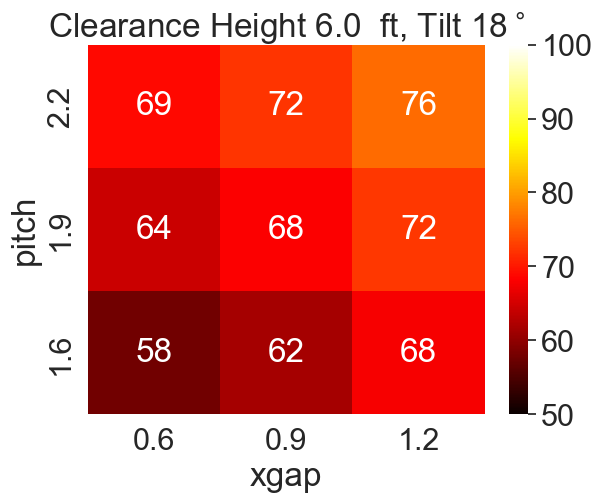

xgap         0.6        0.9        1.2
pitch                                 
1.6    57.649230  61.657308  67.723851
1.9    64.362149  68.001933  72.281609
2.2    68.785020  72.234148  76.323625


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


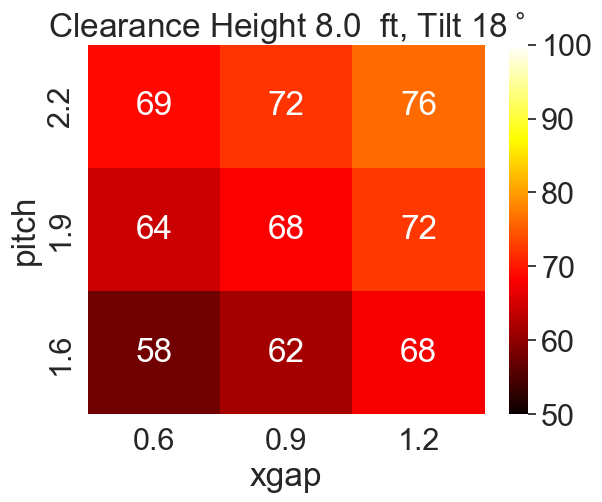

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


xgap         0.6        0.9        1.2
pitch                                 
1.6    57.649230  61.657308  67.723851
1.9    64.362149  68.001933  72.281609
2.2    68.785020  72.234148  76.323625


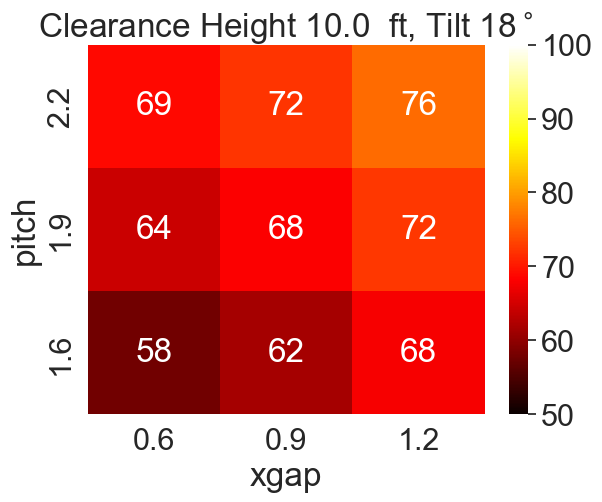

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


xgap         0.6        0.9        1.2
pitch                                 
1.6    57.649230  61.657308  67.723851
1.9    64.362149  68.001933  72.281609
2.2    68.785020  72.234148  76.323625


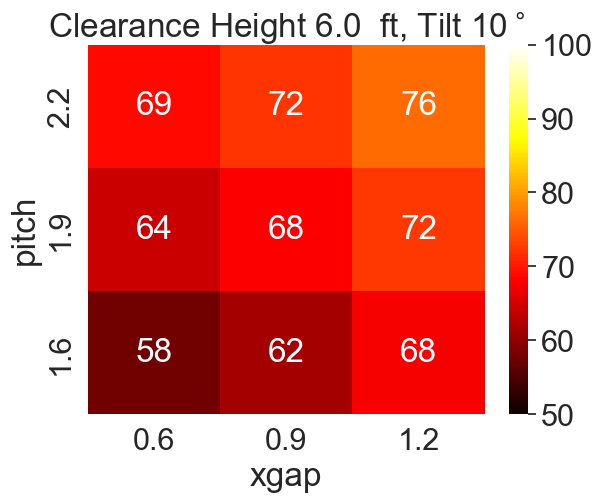

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


xgap         0.6        0.9        1.2
pitch                                 
1.6    57.649230  61.657308  67.723851
1.9    64.362149  68.001933  72.281609
2.2    68.785020  72.234148  76.323625


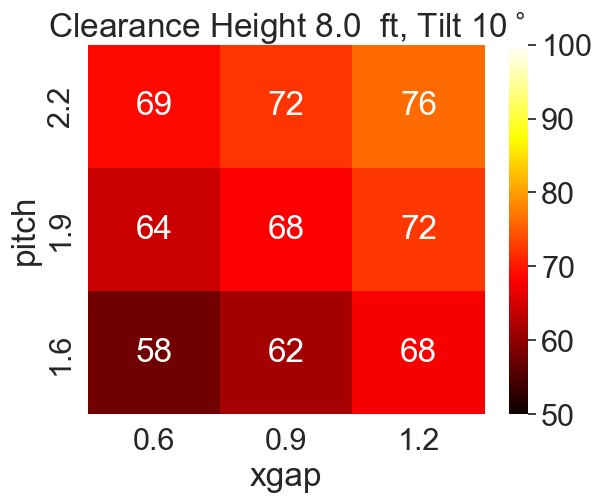

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


xgap         0.6        0.9        1.2
pitch                                 
1.6    57.649230  61.657308  67.723851
1.9    64.362149  68.001933  72.281609
2.2    68.785020  72.234148  76.323625


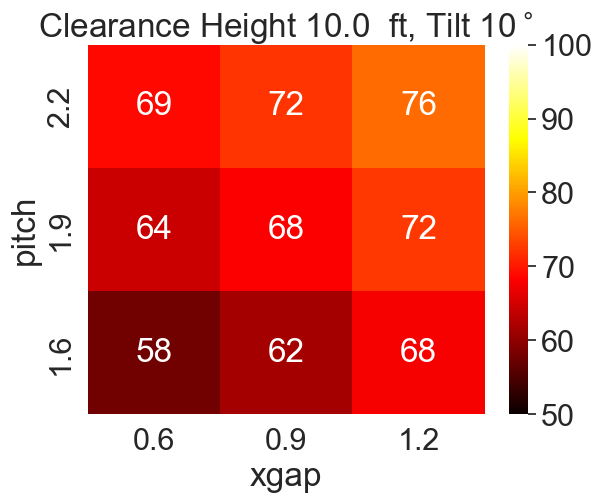

In [100]:
for tilt in tilts_l:
    for clearance_height in ch_l:
        df2=df.loc[df['tilt']==tilts[1]]
        df3 = df2.loc[df2['clearance_height']==clearance_heights[2]]
        df3['pitch']=df3['pitch'].round(1)
        df3['xgap']=df3['xgap'].round(1)

        sns.set(font_scale=2) 
        table = df3.pivot('pitch', 'xgap', 'GroundIrrad_percent_GHI')
        ax = sns.heatmap(table, cmap='hot', vmin = 50, vmax= 100, annot=True)
        ax.invert_yaxis()
        figtitle = 'Clearance Height ' + str(clearance_height/ft2m)+'  ft, Tilt ' + str(tilt) + '$^\circ$'
        plt.title(figtitle)
        print(table)
        plt.show()
        


# 5. Raytrace with Tree Geometry

<a id='step5a'></a>

#### Tree parameters

In [11]:
tree_albedo = 0.165 # Wikipedia [0.15-0.18]
trunk_x = 0.8 * ft2m
trunk_y = trunk_x
trunk_z = 1 * ft2m

tree_x = 3 * ft2m
tree_y = tree_x
tree_z = 4 * ft2m

<a id='step5b'></a>

#### Loop to Raytrace and Sample Irradiance at Each side of the Tree (N, S, E, W)

In [12]:
for ch in range (0, len(clearance_heights)):
    
    clearance_height = clearance_heights[ch]
    for xx in range (0, len(xgaps)):
        
        xgap = xgaps[xx]

        for tt in range (0, len(tilts)):
        
            tilt = tilts[tt]
            for dd in range (0, len(Ds)):
                pitch = y * np.cos(np.radians(tilt))+Ds[dd]

                sim_name = (sim_general_name+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1)))

                coffeeplant_x = (x+xgap)/2
                coffeeplant_y = pitch

                demo.makeModule(name=moduletype, x=x, y=y, xgap = xgap)
                sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 
                scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)

                # Appending the Trees here
                text = ''
                for ii in range(0,3):
                    coffeeplant_x = (x+xgap)/2 + (x+xgap)*ii
                    for jj in range(0,3):
                        coffeeplant_y = pitch/2 + pitch*jj
                        name = 'tree'+str(ii)+str(jj)
                        text += '\r\n! genrev Metal_Grey tube{}tree t*{} {} 32 | xform -t {} {} {}'.format('head'+str(ii)+str(jj),tree_z, tree_x/2.0, 
                                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                                           -trunk_x/2.0 + coffeeplant_y, trunk_z)
                        text += '\r\n! genrev Metal_Grey tube{}tree t*{} {} 32 | xform -t {} {} 0'.format('trunk'+str(ii)+str(jj),trunk_z, trunk_x/2.0, 
                                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                                          -trunk_x/2.0 + coffeeplant_y)
              
                        customObject = demo.makeCustomObject(name,text)
                        demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

                octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  
                analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)


                ii = 1
                jj = 1
                coffeeplant_x = (x+xgap)/2 + (x+xgap)*ii 
                coffeeplant_y = pitch/2 + pitch*jj
                frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=1)

                treescan_south = frontscan.copy()
                treescan_north = frontscan.copy()
                treescan_east = frontscan.copy()
                treescan_west = frontscan.copy()
                
                treescan_south['xstart'] = coffeeplant_x
                treescan_south['ystart'] = coffeeplant_y  - tree_x/2.0 - 0.05
                treescan_south['zstart'] = tree_z
                treescan_south['orient'] = '0 1 0'

                treescan_north['xstart'] = coffeeplant_x
                treescan_north['ystart'] = coffeeplant_y  + tree_x/2.0 + 0.05
                treescan_north['zstart'] = tree_z
                treescan_north['orient'] = '0 -1 0'

                treescan_east['xstart'] = coffeeplant_x + tree_x/2.0 + 0.05
                treescan_east['ystart'] = coffeeplant_y 
                treescan_east['zstart'] = tree_z
                treescan_east['orient'] = '-1 0 0'

                treescan_west['xstart'] = coffeeplant_x - tree_x/2.0 - 0.05
                treescan_west['ystart'] = coffeeplant_y 
                treescan_west['zstart'] = tree_z
                treescan_west['orient'] = '1 0 0'
    
                groundscan = frontscan.copy() 
                groundscan['xstart'] = coffeeplant_x
                groundscan['ystart'] = coffeeplant_y
                groundscan['zstart'] = 0.05
                groundscan['orient'] = '0 0 -1'
                analysis.analysis(octfile, name=sim_name+'_North&South', frontscan=treescan_north, backscan=treescan_south)
                analysis.analysis(octfile, name=sim_name+'_East&West', frontscan=treescan_east, backscan=treescan_west)


Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_North&South_Front
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_North&South_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_North&South.csv
Linescan in process: Coffee_ch_1.8

Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_18_pitch_1.6_East&West_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.9_tilt_18_pitch_1.6_East&West.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy value.This emulates previous behavior.
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_18_pitch_1.9_North&South_Front
Linescan in process: Coffee_ch_1.8_xga

Saved: results\irr_Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_1.9_North&South.csv
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_1.9_East&West_Front
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_1.9_East&West_Back
Saved: results\irr_Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_1.9_East&West.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with the analysis options. Setting sensorsy_back and sensorsy_front to sensorsy val

Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_2.2_North&South_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_2.2_North&South.csv
Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_2.2_East&West_Front
Linescan in process: Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_2.2_East&West_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.6_tilt_18_pitch_2.2_East&West.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with

Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_1.6_North&South_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_1.6_North&South.csv
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_1.6_East&West_Front
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_1.6_East&West_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_1.6_East&West.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with

Linescan in process: Coffee_ch_2.4_xgap_1.2_tilt_10_pitch_1.9_North&South_Back
Saved: results\irr_Coffee_ch_2.4_xgap_1.2_tilt_10_pitch_1.9_North&South.csv
Linescan in process: Coffee_ch_2.4_xgap_1.2_tilt_10_pitch_1.9_East&West_Front
Linescan in process: Coffee_ch_2.4_xgap_1.2_tilt_10_pitch_1.9_East&West_Back
Saved: results\irr_Coffee_ch_2.4_xgap_1.2_tilt_10_pitch_1.9_East&West.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with

Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_2.2_North&South_Back
Saved: results\irr_Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_2.2_North&South.csv
Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_2.2_East&West_Front
Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_2.2_East&West_Back
Saved: results\irr_Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_2.2_East&West.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with

Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_1.6_North&South_Back
Saved: results\irr_Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_1.6_North&South.csv
Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_1.6_East&West_Front
Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_1.6_East&West_Back
Saved: results\irr_Coffee_ch_3.0_xgap_1.2_tilt_18_pitch_1.6_East&West.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee.oct
Variable sensorsy has been deprecated in v0.4, and nowsensorsy_back and sensorsy_front (optional) are being used for more flexibility with

<a id='step5c'></a>

#### Single simulation until MakeOct for Getting a PRETTY IMAGE 

In [13]:
tree_albedo = 0.165 # Wikipedia [0.15-0.18]
trunk_x = 0.8 * ft2m
trunk_y = trunk_x
trunk_z = 1 * ft2m

tree_x = 3 * ft2m
tree_y = tree_x
tree_z = 4 * ft2m


clearance_height = clearance_heights[0]
xgap = xgaps[-1]
tilt = tilts[0]
pitch = y * np.cos(np.radians(tilt))+Ds[-1]

sim_name = (sim_general_name+'_ch_'+str(round(clearance_height,1))+
                '_xgap_'+str(round(xgap,1))+\
                '_tilt_'+str(round(tilt,1))+
                '_pitch_'+str(round(pitch,1)))


demo = bifacial_radiance.RadianceObj(sim_name,str(testfolder))  
demo.setGround(albedo)
demo.readWeatherFile(epwfile)

coffeeplant_x = (x+xgap)/2
coffeeplant_y = pitch

demo.gendaylit(4020)
demo.makeModule(name=moduletype, x=x, y=y, xgap = xgap)
sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 
scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)


for ii in range(0,3):
    coffeeplant_x = (x+xgap)/2 + (x+xgap)*ii
    for jj in range(0,3):
        coffeeplant_y = pitch/2 + pitch*jj
        name = 'tree'+str(ii)+str(jj)
        text = '! genrev litesoil tube{}tree t*{} {} 32 | xform -t {} {} {}'.format('head'+str(ii)+str(jj),tree_z, tree_x/2.0, 
                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                           -trunk_x/2.0 + coffeeplant_y, trunk_z)
        text += '\r\n! genrev litesoil tube{}tree t*{} {} 32 | xform -t {} {} 0'.format('trunk'+str(ii)+str(jj),trunk_z, trunk_x/2.0, 
                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                          -trunk_x/2.0 + coffeeplant_y)

        customObject = demo.makeCustomObject(name,text)
        demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  


path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico
Loading albedo, 1 value(s), 0.250 avg
1 nonzero albedo values.
start: 1991-01-01 01:00:00
end: 1994-12-31 23:00:00
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_2.2.oct


#### Now you can view the Geometry by navigating on the terminal to the testfolder, and using the octfile name generated above

>rvu -vf views\front.vp -e .0265652 -vp 2 -21 2.5 -vd 0 1 0 Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_2.2.oct

<a id='step6'></a>

## 6. Compile Results Trees

In [53]:
# irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back.csv

ch_all = []
xgap_all = []
tilt_all = []
pitch_all = []
NorthIrrad = []
SouthIrrad = []
EastIrrad = []
WestIrrad = []


ft2m = 0.3048
clearance_heights = np.array([6.0, 8.0, 10.0])* ft2m
xgaps = np.array([2, 3, 4]) * ft2m
Ds = np.array([2, 3, 4]) * ft2m    # D is a variable that represents the spacing between rows, not-considering the collector areas.
tilts = [18, 10]
y = 1



for ch in range (0, len(clearance_heights)):
    
    clearance_height = clearance_heights[ch]
    for xx in range (0, len(xgaps)):
        
        xgap = xgaps[xx]

        for tt in range (0, len(tilts)):
        
            tilt = tilts[tt]
            for dd in range (0, len(Ds)):
                pitch = y * np.cos(np.radians(tilt))+Ds[dd]

                sim_name = ('irr_Coffee'+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1))+'_North&South.csv')

                sim_name2 = ('irr_Coffee'+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1))+'_East&West.csv')

                ch_all.append(clearance_height)
                xgap_all.append(xgap)
                tilt_all.append(tilt)
                pitch_all.append(pitch)
                data = pd.read_csv(os.path.join(resultsfolder, sim_name))
                NorthIrrad.append(data['Wm2Front'].item())
                SouthIrrad.append(data['Wm2Back'].item())
                data = pd.read_csv(os.path.join(resultsfolder, sim_name2))
                EastIrrad.append(data['Wm2Front'].item())
                WestIrrad.append(data['Wm2Back'].item())


ch_all = pd.Series(ch_all, name='clearance_height')
xgap_all = pd.Series(xgap_all, name='xgap')
tilt_all = pd.Series(tilt_all, name='tilt')
pitch_all = pd.Series(pitch_all, name='pitch')
NorthIrrad = pd.Series(NorthIrrad, name='NorthIrrad')
SouthIrrad = pd.Series(SouthIrrad, name='SouthIrrad')
EastIrrad = pd.Series(EastIrrad, name='EastIrrad')
WestIrrad = pd.Series(WestIrrad, name='WestIrrad')

df = pd.concat([ch_all, xgap_all, tilt_all, pitch_all, NorthIrrad, SouthIrrad, EastIrrad, WestIrrad], axis=1)
df.to_csv(os.path.join(resultsfolder,'TREES.csv'))


FINISHED


In [55]:
trees = pd.read_csv(os.path.join(resultsfolder, 'TREES.csv'))
trees.tail()

,Unnamed: 0,clearance_height,xgap,tilt,pitch,NorthIrrad,SouthIrrad,EastIrrad,WestIrrad
49,49,3.048,1.2192,18,1.865457,462040.700000,572620.133333,563157.000000,689431.466667
50,50,3.048,1.2192,18,2.170257,487565.600000,596633.366667,615979.466667,746267.033333
51,51,3.048,1.2192,10,1.594408,439950.800000,526637.500000,530540.133333,649736.566667
52,52,3.048,1.2192,10,1.899208,468071.266667,583622.200000,564728.166667,705146.933333
53,53,3.048,1.2192,10,2.204008,466005.166667,607064.466667,613330.966667,751689.966667


In [101]:
trees['TreeIrrad_percent_GHI'] = trees[['NorthIrrad','SouthIrrad','EastIrrad','WestIrrad']].mean(axis=1)*100/puerto_Rico_YEAR

print(trees['TreeIrrad_percent_GHI'].min())
print(trees['TreeIrrad_percent_GHI'].max())

22.35462323522628
34.77799240348259


<a id='step7'></a>

## 7. Plot

In [104]:
tilts_l = list(trees['tilt'].unique())
ch_l = list(trees['clearance_height'].unique())
print(tilts_l)
print(ch_l)

[18, 10]
[1.8288, 2.4384, 3.048]


xgap         0.6        0.9        1.2
pitch                                 
1.6    23.284897  25.653183  27.185995
1.9    25.919667  27.891318  29.398286
2.2    28.090332  29.811146  30.873818


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


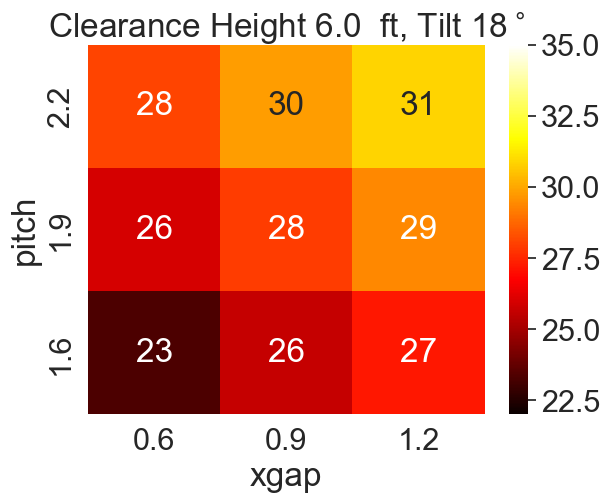

xgap         0.6        0.9        1.2
pitch                                 
1.6    23.284897  25.653183  27.185995
1.9    25.919667  27.891318  29.398286
2.2    28.090332  29.811146  30.873818


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


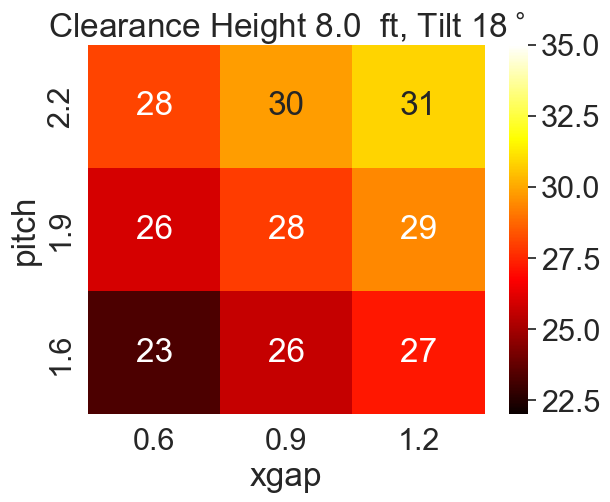

xgap         0.6        0.9        1.2
pitch                                 
1.6    23.284897  25.653183  27.185995
1.9    25.919667  27.891318  29.398286
2.2    28.090332  29.811146  30.873818


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


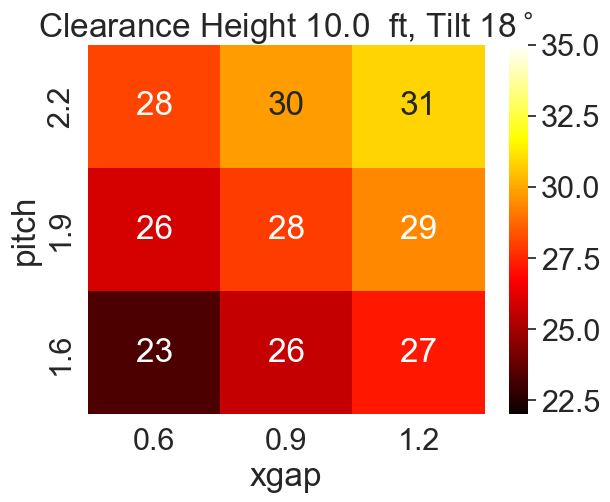

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


xgap         0.6        0.9        1.2
pitch                                 
1.6    23.284897  25.653183  27.185995
1.9    25.919667  27.891318  29.398286
2.2    28.090332  29.811146  30.873818


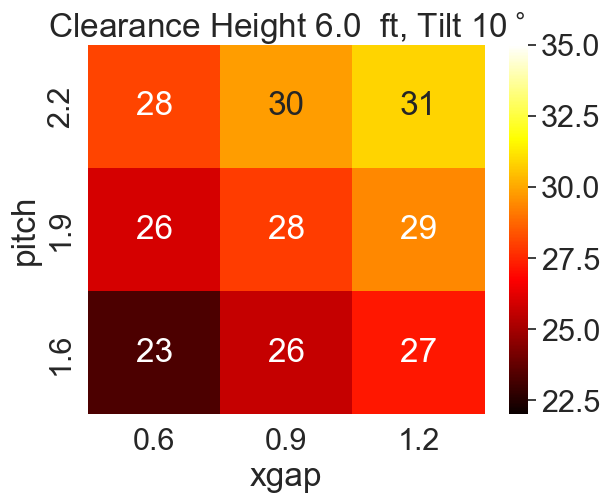

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


xgap         0.6        0.9        1.2
pitch                                 
1.6    23.284897  25.653183  27.185995
1.9    25.919667  27.891318  29.398286
2.2    28.090332  29.811146  30.873818


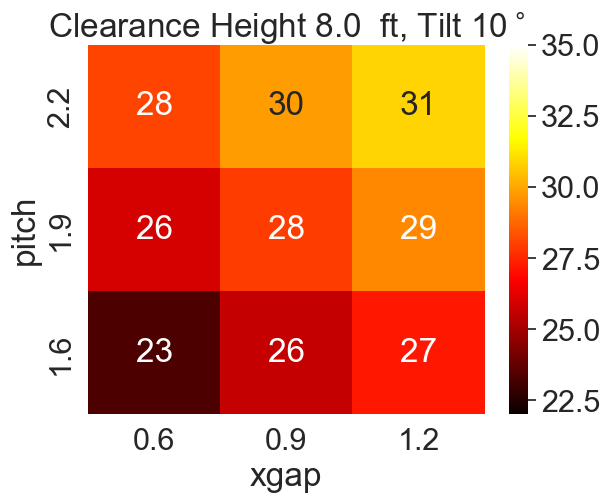

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


xgap         0.6        0.9        1.2
pitch                                 
1.6    23.284897  25.653183  27.185995
1.9    25.919667  27.891318  29.398286
2.2    28.090332  29.811146  30.873818


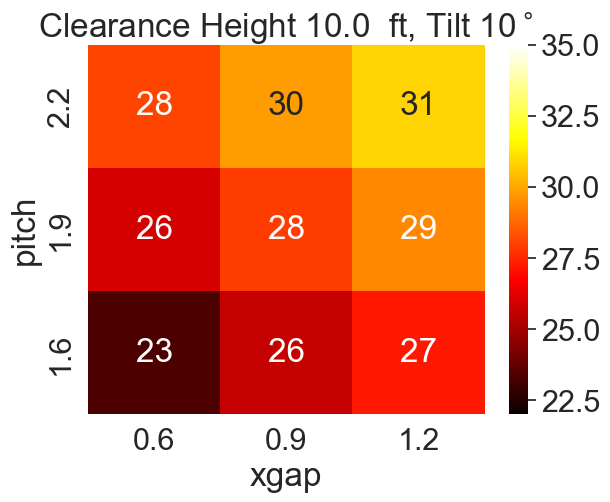

In [107]:
for tilt in tilts_l:
    for clearance_height in ch_l:
        df2=trees.loc[df['tilt']==tilts[1]]
        df3 = df2.loc[df2['clearance_height']==clearance_heights[2]]
        df3['pitch']=df3['pitch'].round(1)
        df3['xgap']=df3['xgap'].round(1)

        sns.set(font_scale=2) 
        table = df3.pivot('pitch', 'xgap', 'TreeIrrad_percent_GHI')
        ax = sns.heatmap(table, cmap='hot', vmin = 22, vmax= 35, annot=True)
        ax.invert_yaxis()
        figtitle = 'Clearance Height ' + str(clearance_height/ft2m)+'  ft, Tilt ' + str(tilt) + '$^\circ$'
        plt.title(figtitle)
        print(table)
        plt.show()
        
